### Module import

In [2]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from utils import visualize_cam, Normalize
from gradcam import GradCAM, GradCAMpp
from PIL import ImageFont
from PIL import ImageDraw 

### Load image

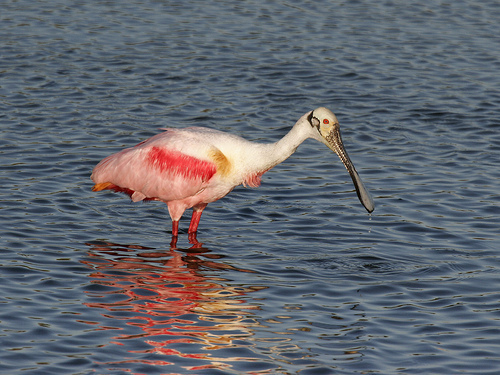

In [3]:
img_dir = 'images'
# img_name = 'collies.JPG'
# img_name = 'multiple_dogs.jpg'
# img_name = 'snake.JPEG'
img_name = 'water-bird.JPEG'
img_path = os.path.join(img_dir, img_name)

pil_img = PIL.Image.open(img_path)
pil_img

### preprocess image

In [4]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(224, 224), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/home/cancam/miniconda3/envs/open-mmlab/lib/python3.7/site-packages/torch/nn/functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


### Load torchvision models and make model dictionaries

In [5]:
#alexnet = models.alexnet(pretrained=True)
#alexnet.eval(), alexnet.cuda();

#vgg = models.vgg16(pretrained=True)
#vgg.eval(), vgg.cuda();

#resnet = models.resnet101(pretrained=True)
#resnet.eval(), resnet.cuda();

densenet161 = models.densenet161(pretrained=True)
densenet161.eval(), densenet161.cuda();

densenet121 = models.densenet121(pretrained=True)
densenet121.eval(), densenet121.cuda();

densenet201 = models.densenet201(pretrained=True)
densenet201.eval(), densenet201.cuda();

densenet169 = models.densenet169(pretrained=True)
densenet169.eval(), densenet169.cuda();

#squeezenet = models.squeezenet1_1(pretrained=True)
#squeezenet.eval(), squeezenet.cuda();


cam_dict = dict()

#alexnet_model_dict = dict(type='alexnet', arch=alexnet, layer_name='features_11', input_size=(224, 224))
#alexnet_gradcam = GradCAM(alexnet_model_dict, True)
#alexnet_gradcampp = GradCAMpp(alexnet_model_dict, True)
#cam_dict['alexnet'] = [alexnet_gradcam, alexnet_gradcampp]

#vgg_model_dict = dict(type='vgg', arch=vgg, layer_name='features_29', input_size=(224, 224))
#vgg_gradcam = GradCAM(vgg_model_dict, True)
#vgg_gradcampp = GradCAMpp(vgg_model_dict, True)
#cam_dict['vgg'] = [vgg_gradcam, vgg_gradcampp]

#resnet_model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(224, 224))
#resnet_gradcam = GradCAM(resnet_model_dict, True)
#resnet_gradcampp = GradCAMpp(resnet_model_dict, True)
#cam_dict['resnet'] = [resnet_gradcam, resnet_gradcampp]

densenet_model_dict = dict(type='densenet161', arch=densenet161, layer_name='features_norm5', input_size=(224, 224))
densenet_gradcam = GradCAM(densenet_model_dict, True)
densenet_gradcampp = GradCAMpp(densenet_model_dict, True)
cam_dict['densenet161'] = [densenet_gradcam, densenet_gradcampp]

densenet_model_dict = dict(type='densenet121', arch=densenet121, layer_name='features_norm5', input_size=(224, 224))
densenet_gradcam = GradCAM(densenet_model_dict, True)
densenet_gradcampp = GradCAMpp(densenet_model_dict, True)
cam_dict['densenet121'] = [densenet_gradcam, densenet_gradcampp]

densenet_model_dict = dict(type='densenet201', arch=densenet201, layer_name='features_norm5', input_size=(224, 224))
densenet_gradcam = GradCAM(densenet_model_dict, True)
densenet_gradcampp = GradCAMpp(densenet_model_dict, True)
cam_dict['densenet201'] = [densenet_gradcam, densenet_gradcampp]


densenet_model_dict = dict(type='densenet169', arch=densenet169, layer_name='features_norm5', input_size=(224, 224))
densenet_gradcam = GradCAM(densenet_model_dict, True)
densenet_gradcampp = GradCAMpp(densenet_model_dict, True)
cam_dict['densenet169'] = [densenet_gradcam, densenet_gradcampp]

#squeezenet_model_dict = dict(type='squeezenet', arch=squeezenet, layer_name='features_12_expand3x3_activation', input_size=(224, 224))
#squeezenet_gradcam = GradCAM(squeezenet_model_dict, True)
#squeezenet_gradcampp = GradCAMpp(squeezenet_model_dict, True)
#cam_dict['squeezenet'] = [squeezenet_gradcam, squeezenet_gradcampp]

saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])


### Feedforward image, calculate GradCAM/GradCAM++, and gather results

In [30]:
images = []
for gradcam, gradcam_pp in cam_dict.values():
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
    images.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
images = make_grid(torch.cat(images, 0), nrow=5)

### Save and show results 

In [31]:
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)
output_name = img_name
output_path = os.path.join(output_dir, output_name)

save_image(images, output_path)
im = PIL.Image.open(output_path)
fontsize = 20
font = ImageFont.truetype("/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf", fontsize)

ImageDraw.Draw(
    im  # Image
).text(
    (5, 40),  # Coordinates
    'DenseNet161',  # Text
    (0, 0, 0),  # Color
    font = font
    
)

ImageDraw.Draw(
    im  # Image
).text(
    (5, 224+40),  # Coordinates
    'DenseNet121',  # Text
    (0, 0, 0),  # Color
    font = font
    
)

ImageDraw.Draw(
    im  # Image
).text(
    (5, 224*2+40),  # Coordinates
    'DenseNet201',  # Text
    (0, 0, 0),  # Color
    font = font
)

ImageDraw.Draw(
    im  # Image
).text(
    (5, 224*3+40),  # Coordinates
    'DenseNet169',  # Text
    (0, 0, 0),  # Color
    font = font
)


ImageDraw.Draw(
    im  # Image
).text(
    (65 + 5, 5),  # Coordinates
    'Input',  # Text
    (0, 0, 0),  # Color
    font = font
    
)

ImageDraw.Draw(
    im  # Image
).text(
    ((20 + 5) + 224, 5),  # Coordinates
    'GradCAM Heatmap',  # Text
    (0, 0, 0),  # Color
    font = font
    
)

ImageDraw.Draw(
    im  # Image
).text(
    ((20 + 5) + 224*2, 5),  # Coordinates
    'GradCAM Output',  # Text
    (0, 0, 0),  # Color
    font = font
)

ImageDraw.Draw(
    im  # Image
).text(
    ((20 + 5) + 224 *3, 5),  # Coordinates
    'GradCAM++ Heatmap',  # Text
    (0, 0, 0),  # Color
    font = font
)


ImageDraw.Draw(
    im  # Image
).text(
    ((20 + 5) + 224 *4, 5),  # Coordinates
    'GradCAM++ Output',  # Text
    (0, 0, 0),  # Color
    font = font
)


im.save(output_path)